<IPython.core.display.Javascript object>


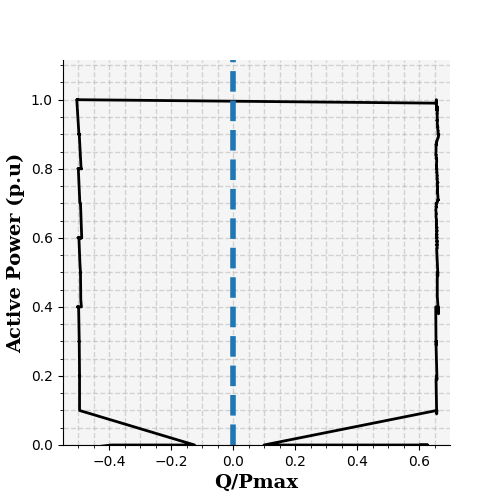

Text(0.5, 0, 'Q/Pmax')

In [11]:
p=[data['P/P'][i] for i in reversed(range(360))]
p=p+data['P/P'][360:].tolist()
q=[data['Q/P'][i] for i in reversed(range(360))]
q=q+data['Q/P'][360:].tolist()
fig, ax = plt.subplots(figsize=(5,5))
l1 = ax.plot(q,f,label='V(Q)',linewidth=2,c='k')
# l2 = ax.plot(data['Q/Pmax'],0.85*np.ones(len(data['V(p.u)'])),linewidth=2,c=l1[0].get_color())
ax.axvline(linewidth=4, ls='--')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('whitesmoke')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('Active Power (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)


<IPython.core.display.Javascript object>


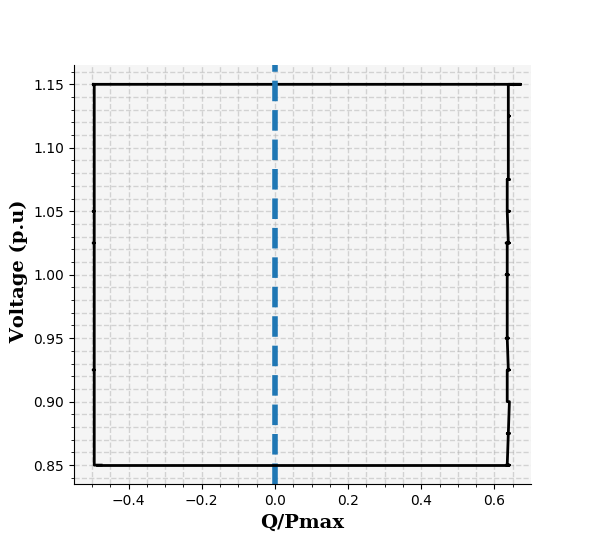

In [51]:
fig, ax = plt.subplots(figsize=(5,5))
l1 = ax.plot(data['Q/Pmax'],data['V(p.u)'],label='V(Q)',linewidth=2,c='k')
ax.axvline(linewidth=4, ls='--')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('whitesmoke')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
# ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel(' Voltage (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)
ax.axhline(y=0.85,xmin=0.05,xmax=0.95,linewidth=2, ls='-',c='k')

Please enter the path of you csv file:/home/spiros/Data/Kazakstan/mkat_24_01.csv


<IPython.core.display.Javascript object>


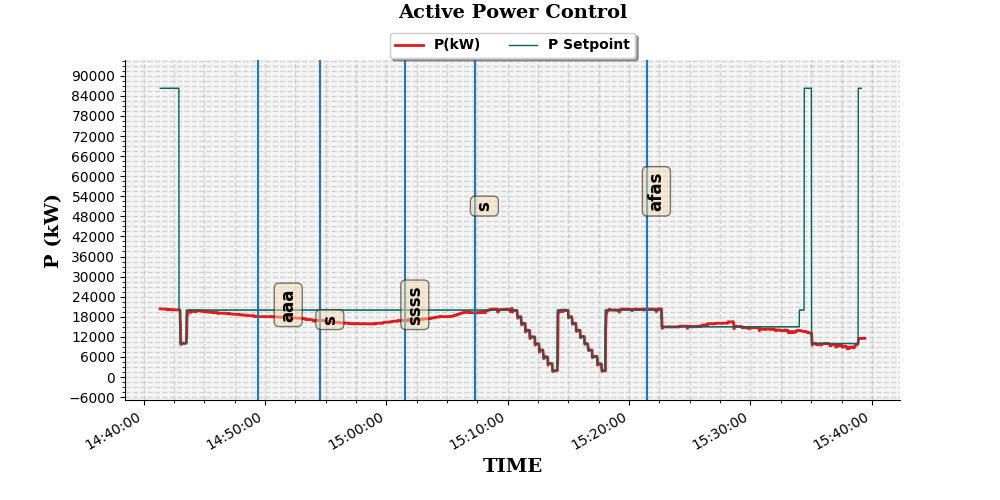

7

In [38]:
import tkinter as tk
from tkinter import font,simpledialog
from plot_maplot_v1 import *
%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)
fig,axes,lines,leg= plot_P(time,m['P'].iloc[:,0],s['P'].iloc[:,0],en['P'].iloc[:,0],200)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
def onpick(event):
    if event.artist in lines:
        global k
        global x
        global y
        x = event.mouseevent.xdata
        y = event.mouseevent.ydata
        L =  axes[0].axvline(x=x)
        w=tk.Tk()
        w.withdraw()
        ask_text = simpledialog.askstring("Text for line","Insert text")
        k=axes[0].text(x,(axes[0].get_ylim()[1]-axes[0].get_ylim()[0])/2,ask_text,rotation=90,fontdict={'size':12,'weight':'bold'},bbox=props)
        fig.canvas.draw()
        
fig.canvas.mpl_connect('pick_event',onpick)

In [44]:
k.set_position((x+100/84000,y))

<IPython.core.display.Javascript object>


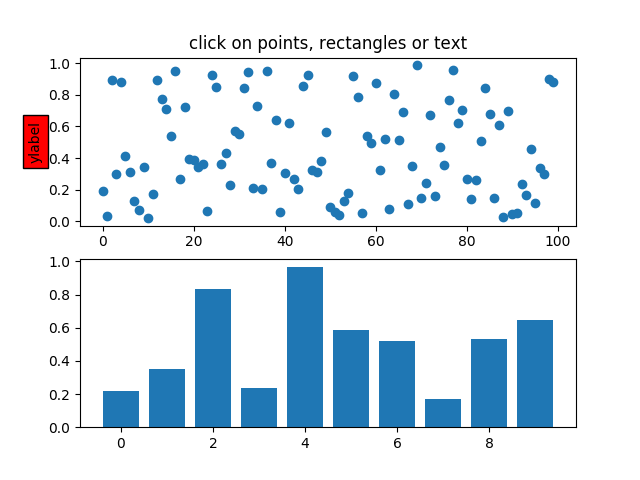

7

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.text import Text
from matplotlib.image import AxesImage
import numpy as np
from numpy.random import rand



# simple picking, lines, rectangles and text
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_title('click on points, rectangles or text', picker=True)
ax1.set_ylabel('ylabel', picker=True, bbox=dict(facecolor='red'))
line, = ax1.plot(rand(100), 'o', picker=5)  # 5 points tolerance

# pick the rectangle
bars = ax2.bar(range(10), rand(10), picker=True)
for label in ax2.get_xticklabels():  # make the xtick labels pickable
    label.set_picker(True)

def onpick1(event):
    if isinstance(event.artist, Line2D):
        thisline = event.artist
        xdata = thisline.get_xdata()
        ydata = thisline.get_ydata()
        ind = event.ind
        print('onpick1 line:', np.column_stack([xdata[ind], ydata[ind]]))
    elif isinstance(event.artist, Rectangle):
        patch = event.artist
        print('onpick1 patch:', patch.get_path())
    elif isinstance(event.artist, Text):
        text = event.artist
        print('onpick1 text:', text.get_text())

fig.canvas.mpl_connect('pick_event', onpick1)


In [13]:
a=[1,2,3]

In [16]:
max(a)

3

In [1]:
import matplotlib.dates as mdates

In [32]:
mdates.num2date(693596.6883640904+2/86400)

datetime.datetime(1900, 1, 1, 16, 31, 16, 657400, tzinfo=datetime.timezone.utc)

<IPython.core.display.Javascript object>


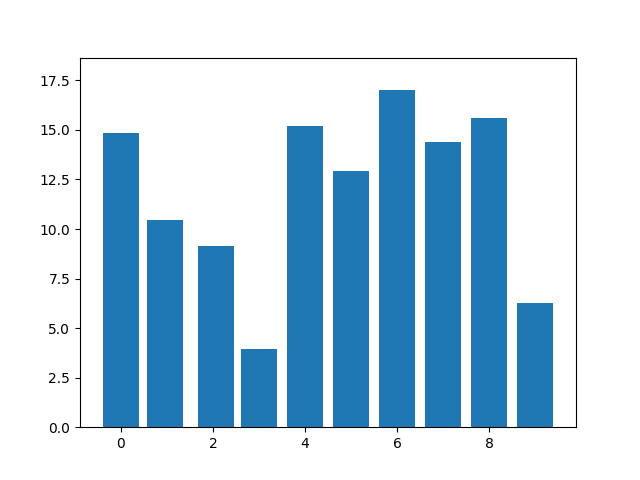

In [16]:
from matplotlib.text import Text
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np


class DraggableRectangle:
    def __init__(self, rect):
        self.rect = rect
        self.press = None

    def connect(self):
        'connect to all the events we need'
        self.cidpress = self.rect.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)

    def on_press(self, event):
        'on button press we will see if the mouse is over us and store some data'
        if event.inaxes != self.rect.axes: return

        contains, attrd = self.rect.contains(event)
        if not contains: return
        print('event contains', self.rect.xy)
        x0, y0 = self.rect.xy
        self.press = x0, y0, event.xdata, event.ydata

    def on_motion(self, event):
        'on motion we will move the rect if the mouse is over us'
        if self.press is None: return
        if event.inaxes != self.rect.axes: return
        x0, y0, xpress, ypress = self.press
        dx = event.xdata - xpress
        dy = event.ydata - ypress
        #print('x0=%f, xpress=%f, event.xdata=%f, dx=%f, x0+dx=%f' %
        #      (x0, xpress, event.xdata, dx, x0+dx))
        self.rect.set_x(x0+dx)
        self.rect.set_y(y0+dy)

        self.rect.figure.canvas.draw()


    def on_release(self, event):
        'on release we reset the press data'
        self.press = None
        self.rect.figure.canvas.draw()

    def disconnect(self):
        'disconnect all the stored connection ids'
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)

fig = plt.figure()
ax = fig.add_subplot(111)
rects = ax.bar(range(10), 20*np.random.rand(10))
drs = []
for rect in rects:
    dr = DraggableRectangle(rect)
    dr.connect()
    drs.append(dr)

plt.show()

In [1]:
from plot_maplot_v1 import *
import tkinter as tk
from tkinter import colorchooser,filedialog,simpledialog,messagebox,font
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg,NavigationToolbar2Tk
from matplotlib.lines import Line2D
from matplotlib.text import Text
import matplotlib as mpl
import sys
import re
import numpy as np
class move_text:
    def __init__(self,text,figure):
        self.text=text
        self.figure=figure
        self.pick=None
    def connect(self):
        'connect to all the events we need'
        self.cidpress = self.figure.canvas.mpl_connect('pick_event', self.on_pick)
        self.cidrelease = self.figure.canvas.mpl_connect('button_release_event', self.on_release)
        self.cidmotion = self.figure.canvas.mpl_connect('motion_notify_event', self.on_motion)

    def on_pick(self, event):
        'on button pick we will see if the mouse is over us and store some data'
#         if event.inaxes != self.text.get_bbox_patch(): 
#             return
#         if isinstance(event.artist, Text):
#         if self.text.contains(event)==False:
#             return
        
        x0, y0 = self.text.get_position()
        self.pick = x0, y0, event.mouseevent.xdata,event.mouseevent.ydata

    def on_motion(self, event):
        'on motion we will move the rect if the mouse is over us'
        if self.pick is None:
            return
        if self.text.contains(event)==False:
            return
        # if isinstance(event.artist, Text)==False:
        #     return

        self.text.set_position((event.xdata,event.ydata))
        # self.text.set_y(event.ydata)

        self.figure.canvas.draw()

    def on_release(self, event):
        'on release we reset the press data'
        self.pick = None
        self.figure.canvas.draw()


    def disconnect(self):
        'disconnect all the stored connection ids'
        self.figure.canvas.mpl_disconnect(self.cidpress)
        self.figure.canvas.mpl_disconnect(self.cidrelease)
        self.figure.canvas.mpl_disconnect(self.cidmotion)

In [2]:
def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    if event.artist in lined.keys():
        legline = event.artist
        origline = lined[legline]
        vis = not origline.get_visible()
        origline.set_visible(vis)
        try:
            if tuple(lines[-1].get_facecolor()[0][0:3]) == origline.get_color():
                lines[-1].set_visible(vis)
        except:
            pass
        # Change the alpha on the line in the legend so we can see what lines
        # have been toggled
        if vis:
            legline.set_alpha(1.0)
        else:
            legline.set_alpha(0.2)
        fig.canvas.draw()
    fig.canvas.mpl_connect('pick_event', onpick)

Please enter the path of you csv file:/home/skont/Data/Kazakstan/mkat_24_01.csv


<IPython.core.display.Javascript object>


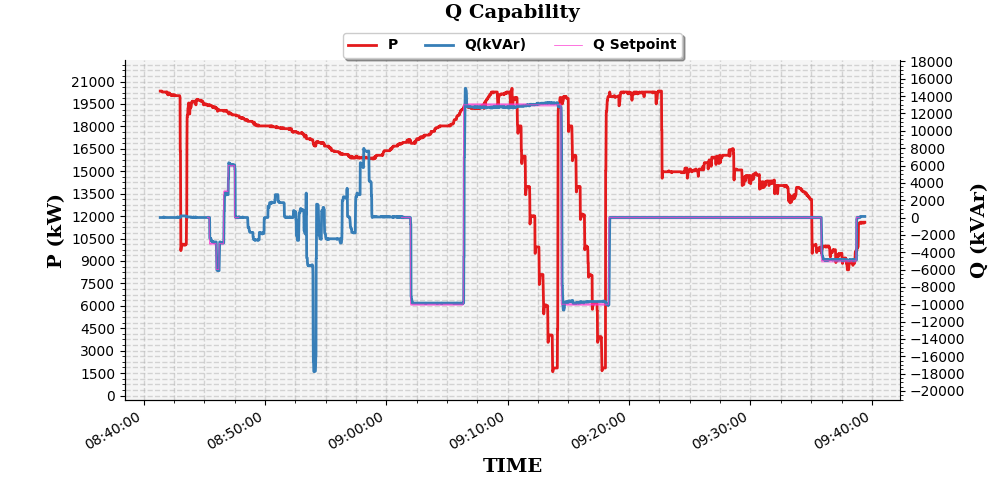

In [18]:
%matplotlib notebook
from plot_maplot_v1 import *
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)
fig,axes,lines,leg= plot_PQ(time,m['P'].iloc[:,0],m['Q'].iloc[:,0],s['Q'].iloc[:,1-1],en['Q'].iloc[:,0],200)
lined = dict()
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(5)  # 5 pts tolerance
    lined[legline] = origline
def onpick(event):
    
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    if event.artist in lined.keys():
        legline = event.artist
        origline = lined[legline]
        vis = not origline.get_visible()
        origline.set_visible(vis)
        try:
            if tuple(lines[-1].get_facecolor()[0][0:3]) == origline.get_color():
                lines[-1].set_visible(vis)
        except:
            pass
        # Change the alpha on the line in the legend so we can see what lines
        # have been toggled
        if vis:
            legline.set_alpha(1.0)
        else:
            legline.set_alpha(0.2)
        fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)
lines[0].set_label("P")
lines[1].set_label("Q")
lines[2].set_label("Qs")
labs = [l.get_label() for l in lines]

fig.canvas.draw()

In [20]:
# lines[0].set_label("P")
# lines[1].set_label("Q")
# lines[2].set_label("Qs")
# labs = [l.get_label() for l in lines]
fig.canvas.draw()

TypeError: 'tuple' object does not support item assignment

In [34]:
leg.get_texts()[0].get_text()

'P'

In [1]:
from plot_maplot_v1 import *
import numpy as np
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)
def custom_plot(x,*args,**kwargs):
    lines=[]
    axes=[]
    fig, ax = plt.subplots(figsize=(10,5))
    axes.append(ax)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor('whitesmoke')
    ax.grid(which='both',ls='--',lw=1,alpha=0.5)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel('X Label goes here',fontdict=font)
    ax.set_ylabel('Y1 label goes here',fontdict=font)
   
    for arg in args:
        if arg["ax2"]==True:
            ax2 = ax.twinx()
            axes.append(ax2)
            ax2.spines["top"].set_visible(False)
            ax2.spines["right"].set_visible(False)
            ax2.set_facecolor('whitesmoke')
            ax2.grid(which='both',ls='--',lw=1,alpha=0.5)
            ax2.xaxis.set_minor_locator(AutoMinorLocator())
            ax2.yaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
            ax2.yaxis.set_minor_locator(AutoMinorLocator())
            ax2.set_ylabel('Y2 label goes here',fontdict=font)
            break
    i=1
    j=1    
    for arg in args:    
        if arg["ax2"]==False:
            l,=ax.plot(x,arg["tr"],label="Y1,"+str(i),color=np.random.rand(3,),linewidth=2)
            lines.append(l)
            i+=1
        else:
            l,=ax2.plot(x,arg["tr"],label="Y2,"+str(j),color=np.random.rand(3,),linewidth=2)
            lines.append(l)
            j+=1
    labs = [l.get_label() for l in lines]
    leg = axes[0].legend(lines,labs,bbox_to_anchor=(0.5, 1.1),loc='upper center',ncol=len(lines),prop=legend_font,
                   fancybox=True, shadow=True)
    try:
        m = min([min(calc_minmax(y["tr"])) for y in args if y["ax2"]==True])
        M = max([max(calc_minmax(y["tr"])) for y in args if y["ax2"]==True])
        ax2.set_ylim(m,M)
    except:pass
    
    try:
        m = min([min(calc_minmax(y["tr"])) for y in args if y["ax2"]==False])
        M = max([max(calc_minmax(y["tr"])) for y in args if y["ax2"]==False])
        ax.set_ylim(m,M)
    except:pass
    return (fig,fig.axes,lines,leg)

Please enter the path of you csv file:/home/spiros/Data/Kazakstan/mkat_24_01.csv


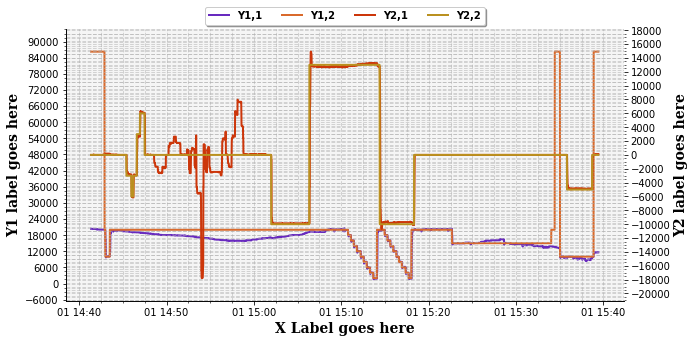

In [3]:
y1={"tr":m['P'].iloc[:,0],"ax2":False}
y2={"tr":s['P'].iloc[:,0],"ax2":False}
y3={"tr":m['Q'].iloc[:,0],"ax2":True}
y4={"tr":s['Q'].iloc[:,0],"ax2":True}
fig,axes,lines,leg=custom_plot(time,y1,y2,y3,y4)

In [9]:
fig.legend()

<bound method Figure.legend of <Figure size 720x360 with 2 Axes>>

In [36]:
lines[0].set_label("DKSJD")

In [39]:
leg.get_lines()[0].get_label()

'Y1,1'

In [21]:
calc_minmax(y1['tr'],y2['tr'])

(-6870.9598000000005, 94715.5418)

In [11]:
m['P'].min()

ppc:P0    1594.582
dtype: float64

In [37]:
list(data.columns)

['TIME',
 'ppc:P0',
 'ppc:Q0',
 'ppc:V0',
 'ppc:F',
 'ppc:PF',
 'apc:PSP0',
 'rpc:QSP0',
 'avr:VSP0',
 'apc:FSP',
 'pfc:PFSP',
 'apc:En',
 'rpc:En',
 'avr:En',
 'apc:FCAct',
 'pfc:En',
 'apc:Mode',
 'rpc:Mode',
 'apc:_PFB',
 'rpc:_QFBAvg',
 'rpc:_QFBMax',
 'rpc:_QFBMin',
 'apc:_PSP_o',
 'rpc:_QSP_o',
 'apc:PID_Status',
 'rpc:PID_Status']

In [12]:
import tkinter as tk
from plot_maplot_v1 import *
data = get_data_from_csv('/home/skont/Data/Kazakstan/mkat_24_01.csv')
master = tk.Tk()
master.withdraw()

def apply_trace():
    global sel_x
    sel_x = var_x.get()
    master.destroy()
    
custom_trace=tk.Toplevel(master)
custom_trace.resizable(width=False, height=False)
custom_trace.geometry("220x100")
custom_trace.grid_columnconfigure(0, weight=1)
custom_trace.grid_rowconfigure(0, weight=1)
choices = list(data.columns)

x_ch =tk.Frame(custom_trace)
x_ch.grid(row=0,column=0,sticky=tk.NSEW)
x_ch.grid_columnconfigure(0,weight=1)

var_x = tk.StringVar(x_ch)
var_x.set('TIME')
w_x = tk.OptionMenu(x_ch, var_x, *choices)
w_x.grid(row=0,columnspan=2,sticky=tk.NSEW)

buts =tk.Frame(custom_trace)
buts.grid(row=1,column=0,sticky=tk.NSEW)
buts.grid_columnconfigure(0,weight=1)
custom_apply = tk.Button(buts,text="Apply",command=apply_trace)
custom_apply.grid(row=1,column=1,pady=5,sticky=tk.NSEW)
custom_quit  = tk.Button(buts,text="Quit",command=master.destroy)
custom_quit.grid(row=1,column=0,pady=5,sticky=tk.NSEW)

master.mainloop()

In [13]:
sel_x

'avr:En'

In [2]:
import tkinter as tk
from plot_maplot_v1 import *
data = get_data_from_csv('/home/skont/Data/Kazakstan/mkat_24_01.csv')
master = tk.Tk()
master.withdraw()

num_tr=0
y1_traces=[]
y1_vars=[]
choices = list(data.columns)
sel_traces=[]

def apply_trace():
    for var in y1_vars:
        sel_traces.append(var.get())
    master.destroy()
    
def add_trace():
    global num_tr
    num_tr+=1
    y_ch =tk.Frame(custom_trace)
    y_ch.grid(row=num_tr,column=0,sticky=tk.NSEW)
    y_ch.grid_columnconfigure(0,weight=1)
    var_y = tk.StringVar(y_ch)
    var_y.set(list(data.columns)[1])
    y1_vars.append(var_y)
    w_y = tk.OptionMenu(y_ch, var_y, *choices)
    w_y.grid(row=num_tr,columnspan=2,sticky=tk.NSEW)
    buts.grid(row=num_tr+1,column=0,sticky=tk.NSEW)
    y1_traces.append(y_ch)
    
def remove_trace():
    global num_tr
    if num_tr>0:
        num_tr-=1
        y1_traces[-1].grid_forget()
        y1_traces[-1].destroy()
        y1_traces.pop()
        y1_vars.pop()
    
custom_trace=tk.Toplevel(master)
custom_trace.resizable(width=False, height=False)
custom_trace.grid_columnconfigure(0, weight=1)
custom_trace.grid_rowconfigure(0, weight=1)


y_ch =tk.Frame(custom_trace)
y_ch.grid(row=0,column=0,sticky=tk.NSEW)
y_ch.grid_columnconfigure(0,weight=1)
y1_traces.append(y_ch)
var_y = tk.StringVar(y_ch)
var_y.set(list(data.columns)[1])
y1_vars.append(var_y)
w_y = tk.OptionMenu(y_ch, var_y, *choices)
w_y.grid(row=0,columnspan=2,sticky=tk.NSEW)

buts =tk.Frame(custom_trace)
buts.grid(row=1,column=0,sticky=tk.NSEW)
buts.grid_columnconfigure(0,weight=1)
custom_apply = tk.Button(buts,text="Apply",command=apply_trace)
custom_apply.grid(row=1,column=1,sticky=tk.NSEW)
custom_quit  = tk.Button(buts,text="Quit",command=master.destroy)
custom_quit.grid(row=1,column=0,sticky=tk.NSEW)
custom_add = tk.Button(buts,text="+",command=add_trace)
custom_add.grid(row=1,column=2,sticky=tk.NSEW)
custom_remove = tk.Button(buts,text="-",command=remove_trace)
custom_remove.grid(row=1,column=3,sticky=tk.NSEW)

master.mainloop()

In [3]:
sel_traces

['ppc:P0', 'ppc:Q0', 'ppc:V0']

In [15]:
data['ppc:P0'].iloc[:,0]

IndexingError: Too many indexers